In [ ]:
# install Linux Libertine font
!wget 'https://raw.githubusercontent.com/emielsteegh/mdwnlp/main/Experiments/linux-libertine.ttf'

from matplotlib import font_manager as fm

# Pick up any fonts in the current directory.
# If you do end up downloading the fonts to /usr/share/fonts/truetype,
# change this to: fm.findSystemFonts()
font_files = fm.findSystemFonts('.')

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)

--2022-07-21 15:07:15--  https://raw.githubusercontent.com/emielsteegh/mdwnlp/main/linux-libertine.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1677460 (1.6M) [application/octet-stream]
Saving to: ‘linux-libertine.ttf’

linux-libertine.ttf 100%[===================>]   1.60M  --.-KB/s    in 0.06s   

2022-07-21 15:07:15 (28.1 MB/s) - ‘linux-libertine.ttf’ saved [1677460/1677460]



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager

import seaborn as sns

import os
import json
import pickle
 
import pandas as pd
import numpy as np


# plot style
# sns.set_style('ticks')#'whitegrid')        # darkgrid, white grid, dark, white and ticksplt.rc('axes', titlesize=18)

# fontsize of the axes title

plt.style.use('seaborn-paper')  # shouldve know this earlier

plt.rc('axes', labelsize=7)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
plt.rc('font', size=7)          # controls default text sizes
plt.rc('font', family='Linux Libertine')

plt.rc('figure', figsize=(6,3), dpi=300)
plt.rcParams['figure.constrained_layout.use']=True

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.alpha'] = 1.0
plt.rcParams['grid.color'] = '.8'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['lines.linewidth'] = 1

plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.shadow'] = False


# plt.rc('text', usetex = True)

retro_metro = sns.color_palette(["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"])
dutch_field2 = sns.color_palette(["#e60049", "#0bb4ff", "#50e991", "#ffc800", "#9b19f5", "#f46a9b", "#dc0ab4", "#1a53ff", "#00bfa0"])

sns.set_palette(dutch_field2)


In [ ]:
list(dutch_field2.as_hex())

['#e60049',
 '#0bb4ff',
 '#50e991',
 '#ffc800',
 '#9b19f5',
 '#f46a9b',
 '#dc0ab4',
 '#1a53ff',
 '#00bfa0']

### defs

In [ ]:
col_width = 3.3
text_width = 7

def rc2(h = 0.7):
  plt.rc('figure', figsize=(text_width, col_width*h))
  
def rc1(h = 0.6):
  plt.rc('figure', figsize=(col_width,col_width*h))


fig_path = '/content/drive/MyDrive/UvA/thesis/figs/results'

def savefig(p, name, no_save=False):
  if not no_save:
    p.savefig(fig_path+f'/{name}.png', dpi=300)
  p.show()
  

In [ ]:
path = '/experiment-results'

modes = {
  # 128s
  'E-128'       : 'al_ornl_bert_entropy__npt_128',
  'pt-E-128'    : 'al_ornl_bert_entropy__tapt_128',
  'R-128'       : 'al_ornl_bert_random__npt_128',
  'CAL-128'     : 'al_ornl_bert_cal__npt_128',

   # Entropy
  'E-256'       : 'al_ornl_bert_entropy__npt_256',
  'pt-E-256'    : 'al_ornl_bert_entropy__tapt_256',
  'pt-E-512'    : 'al_ornl_bert_entropy__tapt_512',

   # Random
  'R-256'       : 'al_ornl_bert_random__npt_256',
  'pt-R-256'    : 'al_ornl_bert_random__tapt_256',
  
   # CAL
  'CAL-256'     : 'al_ornl_bert_cal__npt_256',
  'pt-CAL-256'  : 'al_ornl_bert_cal__tapt_256',
   
   # FS
  'FS-256'      : 'al_ornl_bert__npt_FS',
}
modes_20 = {
  'R-256'      : 'al_ornl20_bert_random__npt_256',
  'E-256'      : 'al_ornl20_bert_entropy__npt_256',
  'CAL-256'    : 'al_ornl20_bert_cal__npt_256',
  'FS-256'     : 'al_ornl20_bert__npt_FS',
}

In [ ]:
pt_dash_style = ['E-128', 'pt-E-128', 'R-128', 'CAL-128', 'E-256', 'pt-E-256', 'pt-E-512', 'R-256', 'pt-R-256', 'CAL-256', 'pt-CAL-256', 'FS-256']

pt_dash_style = {k : '' if 'pt' in k else (3,1) for k in pt_dash_style}
pt_dash_style['FS-256'] = (3,3)

color_style = {
    'E-128'       : '#0bb4ff',
    'pt-E-128'    : '#1f78b4',
    'R-128'       : '#50e991',
    'CAL-128'     : '#e60049',

    'E-256'       : '#0bb4ff', #B
    'pt-E-256'    : '#1f78b4',
    'pt-E-512'    : '#6a3d9a',

    'R-256'       : '#50e991', # G
    'pt-R-256'    : '#33a02c',
    
    'CAL-256'     : '#e60049', # R
    'pt-CAL-256'  : '#e31a1c',

    'FS-256'      : '#222222',
}

In [ ]:
one = data['1']
one.keys()

dict_keys(['data_percent', 'total_train_samples', 'inference_time', 'selection_time', 'val_results', 'test_results', 'length', 'class_selected_samples', 'class_samples_after', 'class_samples_before'])

In [ ]:
one['val_results']['entropy']

{'mean': 0.03200000151991844, 'var': 0.010999999940395355}

In [ ]:
def collect_results(modes_dict: dict):
  data = None
  results = pd.DataFrame(columns = ['Iteration', 'Total Annotations', 'Model', 'F1', 'Accuracy', 'Recall', 'Precision' , 'Entropy Mean', 'Entropy Var', 'Accuracy & F1', 'Loss', 'class_div', 'Selection Time', 'Inference Time'])

  for mode, path_suffix in modes_dict.items():
    rootdir = os.path.join(path, path_suffix)
    for f in os.listdir(rootdir):
        d = os.path.join(rootdir, f)
        if os.path.isdir(d):
            with open(os.path.join(d, 'results_of_iteration.json'), 'r') as f:
              data = json.load(f)
              itrs = list(filter(lambda k: k.isdigit(), data.keys()))
              for i in itrs:
                itr = data[i]
                itr_results = itr['test_results']
                itr_results['Iteration'] = i
                itr_results['Total Annotations'] = itr['total_train_samples']
                itr_results['class_div'] = itr['class_samples_after']
                itr_results['Model'] = mode
                itr_results['F1'] = itr_results.pop('f1')
                itr_results['Accuracy'] = itr_results.pop('acc')
                itr_results['Loss'] = itr_results.pop('loss')
                itr_results['Recall'] = itr_results.pop('recall')
                itr_results['Precision'] = itr_results.pop('precision')
                entropy = itr_results.pop('entropy')
                itr_results['Entropy Mean'] = entropy['mean']
                itr_results['Entropy Var'] = entropy['var']
                itr_results['Accuracy & F1'] = itr_results.pop('acc_and_f1')
                itr_results['Selection Time'] = itr['selection_time']
                itr_results['Inference Time'] = itr['inference_time']
                results.loc[len(results.index)] = itr_results

  results.head()
  return results 

In [ ]:
results = collect_results(modes)

In [ ]:
results_20 = collect_results(modes_20)

results_20.loc[63] = results_20.loc[64]
results_20.at[64, 'Total Annotations'] = 0 
results_20.tail()

,Iteration,Total Annotations,Model,F1,Accuracy,Recall,Precision,Entropy Mean,Entropy Var,Accuracy & F1,Loss,class_div,Selection Time,Inference Time
60,5,2500,CAL-256,0.244184,0.829589,0.2530,0.3133,1.862,1.439,0.536887,0.751650,"[[20, 8.266666666666666], [15, 1.0], [3, 21.83...",228.137540,404.225045
61,6,3000,CAL-256,0.246055,0.808911,0.2520,0.3104,2.138,1.376,0.527483,0.809277,"[[25, 12.685714285714287], [17, 9.0], [2, 2.80...",247.962876,398.865618
62,7,3500,CAL-256,0.306222,0.863718,0.3048,0.3561,1.664,1.382,0.584970,0.606353,"[[5, 1.825], [1, 9.975000000000001], [4, 5.7],...",257.815086,396.439262
63,2,49500,FS-256,0.649645,0.958096,0.6496,0.6679,0.172,0.154,0.803871,0.155305,"[[19, 0.062], [11, 2.512], [20, 17.34999999999...",0.078134,0.000004
64,2,0,FS-256,0.649645,0.958096,0.6496,0.6679,0.172,0.154,0.803871,0.155305,"[[19, 0.062], [11, 2.512], [20, 17.34999999999...",0.078134,0.000004


In [ ]:
# FS = results[results['Model'] == 'FS-256']
results['Total Annotations'] = np.where(results['Total Annotations']  == 49000, 0, results['Total Annotations'])
# results = results[results['Model'] != 'FS-256']

M128 = results[results['Model'].str.contains('128')]
results = results[~results['Model'].str.contains('128')]
results.head()


,Iteration,Total Annotations,Model,F1,Accuracy,Recall,Precision,Entropy Mean,Entropy Var,Accuracy & F1,Loss,class_div,Selection Time,Inference Time
140,1,500,E-256,0.418293,0.675715,0.4521,0.4725,2.646,0.010,0.547004,1.463658,"[[3, 43.4], [7, 14.000000000000002], [1, 4.2],...",0.100550,168.168239
141,2,1000,E-256,0.520016,0.762983,0.5560,0.4940,2.264,0.275,0.641500,1.054302,"[[4, 11.666666666666666], [7, 12.4666666666666...",0.060266,167.876895
142,3,1500,E-256,0.724533,0.881427,0.7307,0.8799,1.817,0.324,0.802980,0.627370,"[[6, 17.549999999999997], [1, 11.8999999999999...",0.058446,164.854025
143,4,2000,E-256,0.858470,0.921823,0.8591,0.9175,1.428,0.289,0.890147,0.429298,"[[0, 12.479999999999999], [7, 9.04], [4, 10.92...",0.066049,164.859000
144,5,2500,E-256,0.922436,0.950770,0.9150,0.9371,1.076,0.230,0.936603,0.295821,"[[7, 12.1], [2, 11.566666666666666], [0, 11.3]...",0.068820,162.110358


In [ ]:
results.head()

In [ ]:
# # Some tests

# data.keys()
# data['2']['test_results'].keys()
# data['2'].keys()
# itrs = list(filter(lambda k: k.isdigit(), data.keys()))

# results[results.Model.str.contains('512')]

# Figures

### Recall, Precision, Entropy plots

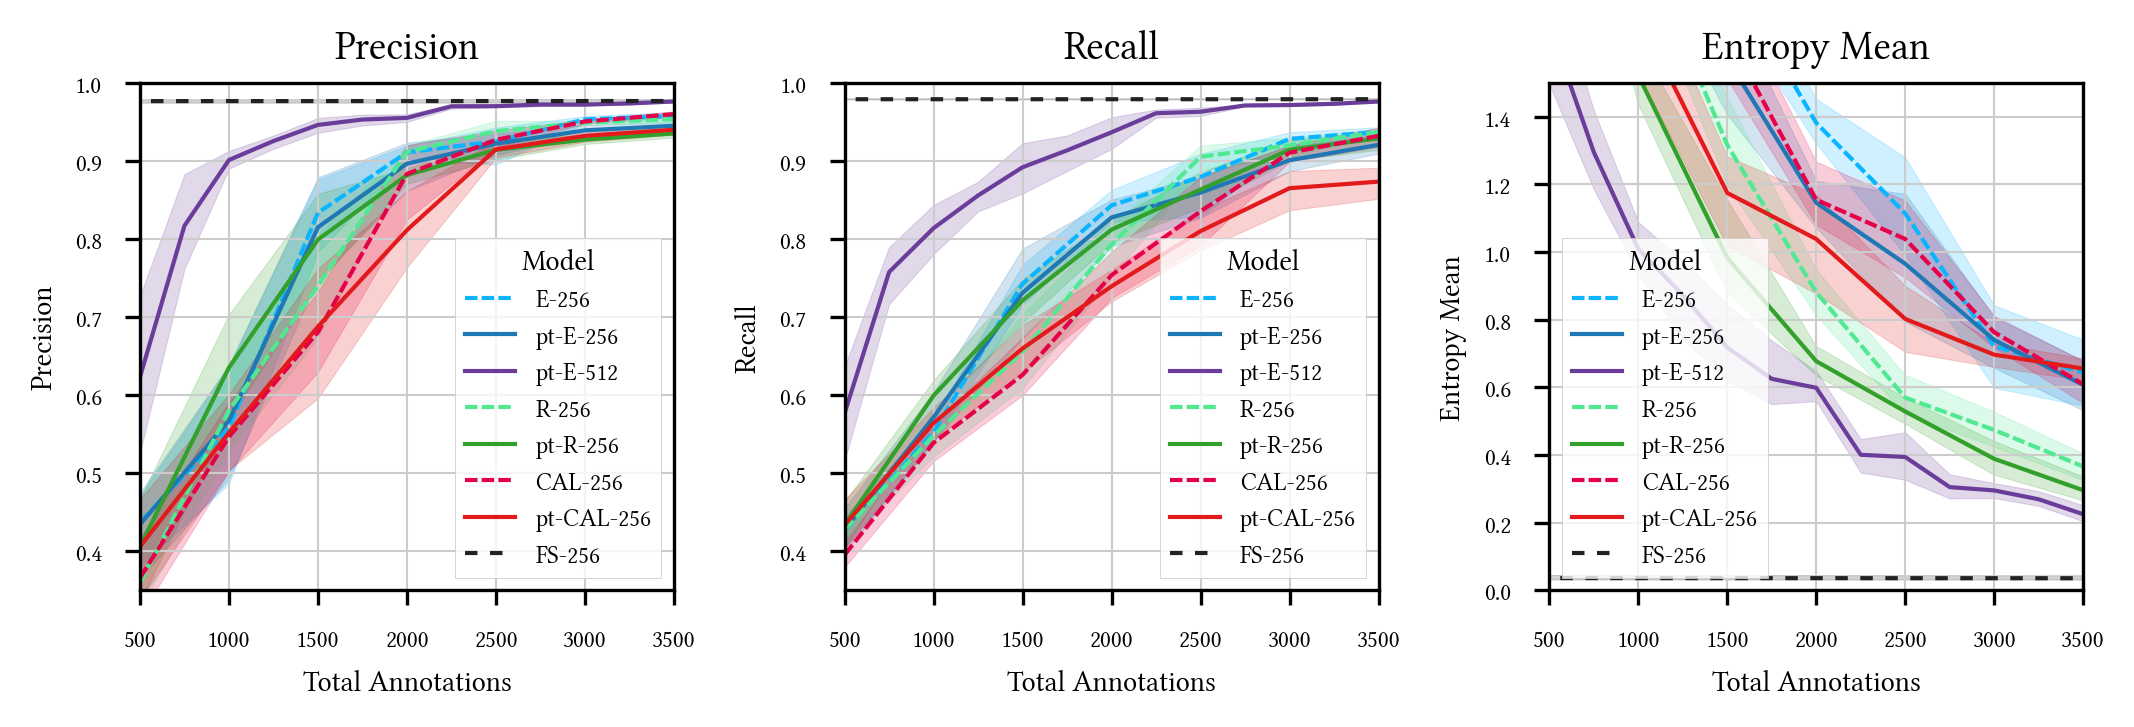

In [ ]:
rc2()
fig, axes = plt.subplots(1, 3, sharey=False)
# fig.suptitle('performance')

sns.lineplot(ax=axes[1], data=results, x="Total Annotations", y="Recall", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[1].set_title("Recall")
axes[1].set_ylim(0.35,1)

sns.lineplot(ax=axes[0], data=results, x="Total Annotations", y="Precision", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)

axes[0].set_title("Precision")
axes[0].set_ylim(0.35,1)

sns.lineplot(ax=axes[2], data=results, x="Total Annotations", y="Entropy Mean", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)

axes[2].set_title("Entropy Mean")
axes[2].set_ylim(0, 1.5)

for i in range(3):
  axes[i].set_xlim(500,3500)
  axes[i].set_xlabel('Total Annotations')

savefig(plt, 'ORNL8-extra-metrics')

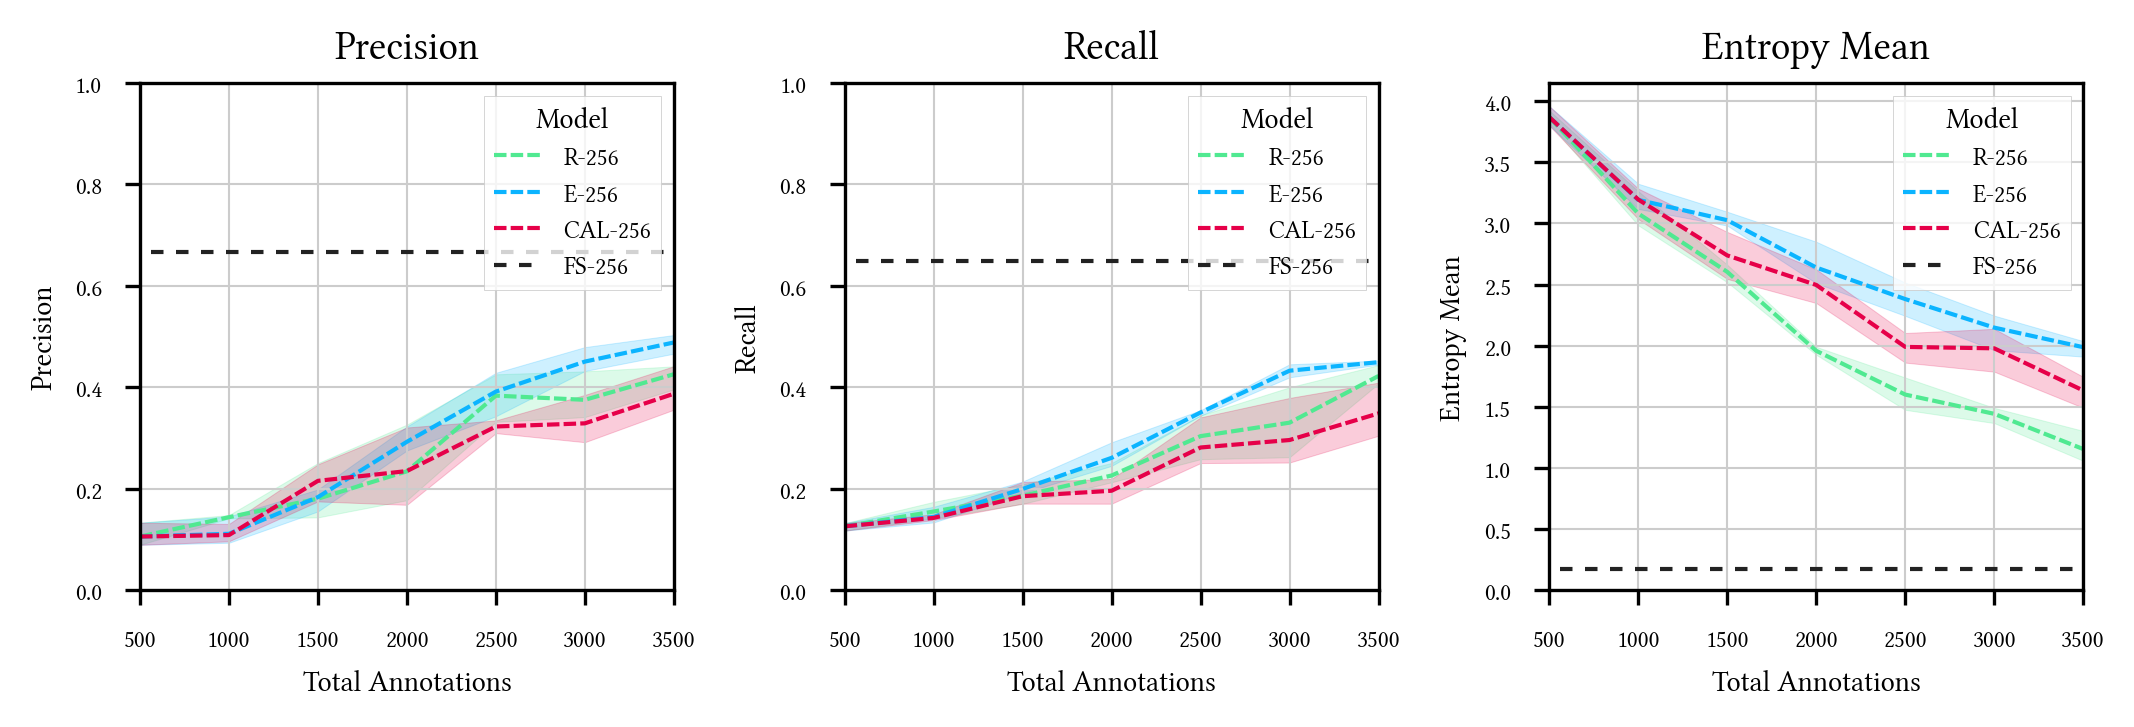

In [ ]:
rc2()
fig, axes = plt.subplots(1, 3, sharey=False)
# fig.suptitle('performance')

sns.lineplot(ax=axes[1], data=results_20, x="Total Annotations", y="Recall", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[1].set_title("Recall")
axes[1].set_ylim(0,1)

sns.lineplot(ax=axes[0], data=results_20, x="Total Annotations", y="Precision", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[0].set_title("Precision")
axes[0].set_ylim(0, 1)

sns.lineplot(ax=axes[2], data=results_20, x="Total Annotations", y="Entropy Mean", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)

axes[2].set_title("Entropy Mean")
axes[2].set_ylim(bottom=0)

for i in range(3):
  axes[i].set_xlim(500,3500)
  axes[i].set_xlabel('Total Annotations')


savefig(plt, 'ORNL26-extra-metrics', no_save=False)

### ORNL 20 plots


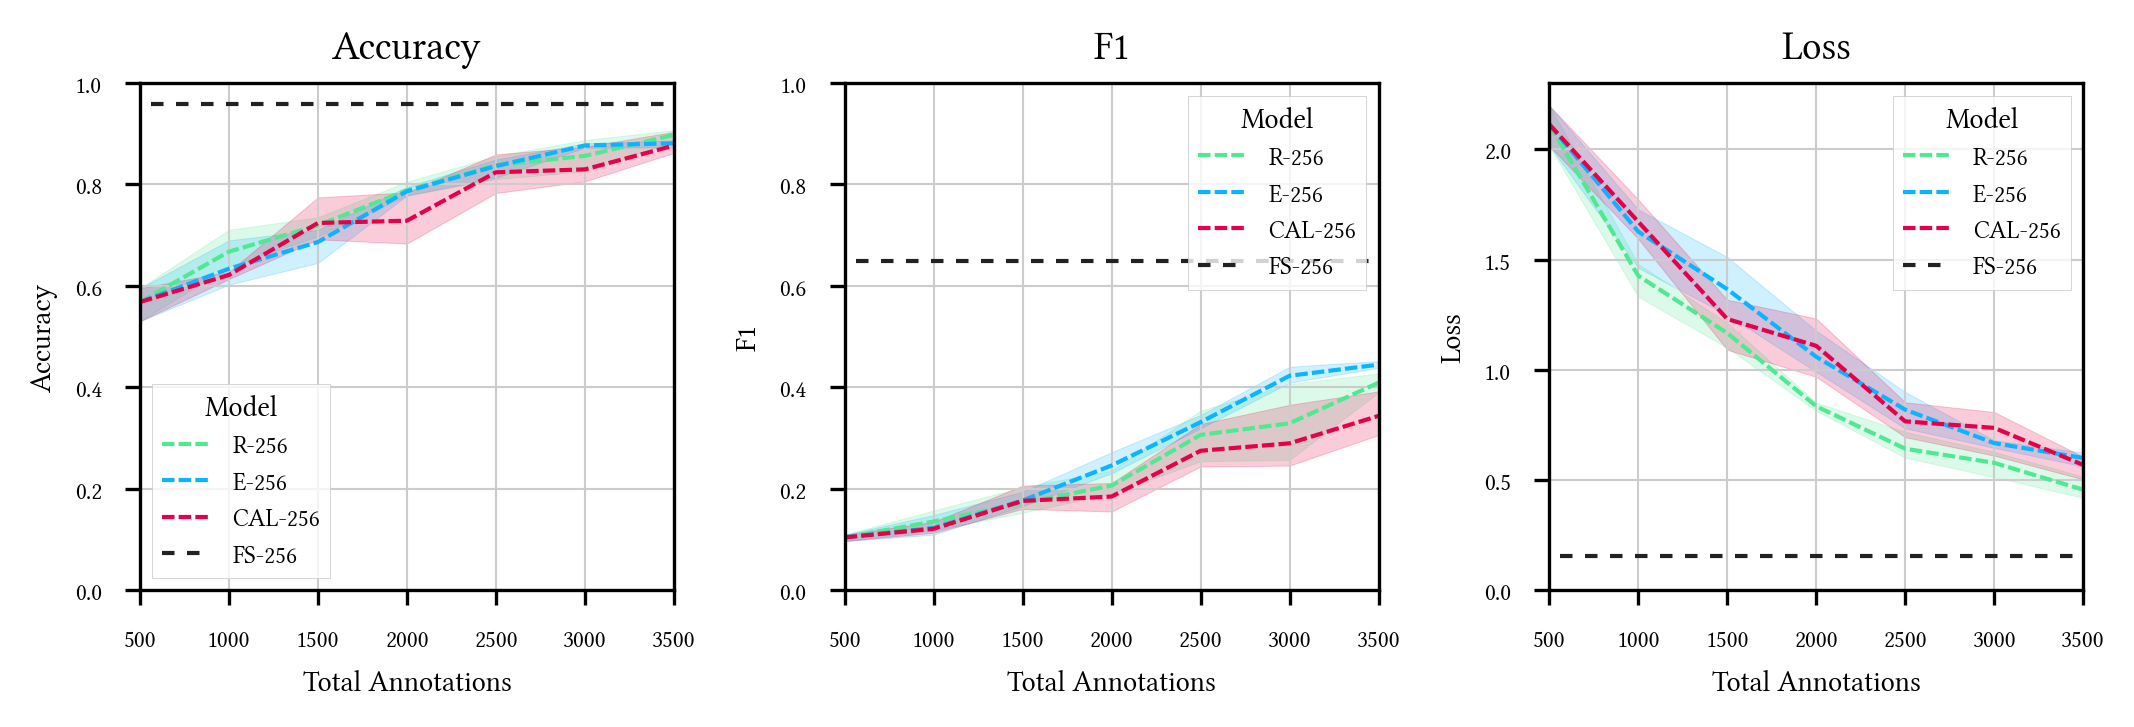

In [ ]:
rc1()

rc2()
fig, axes = plt.subplots(1, 3, sharey=False)
# fig.suptitle('performance')

sns.lineplot(ax=axes[0], data=results_20, x="Total Annotations", y="Accuracy", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[0].set_title("Accuracy")
axes[0].set_ylim(0,1)

sns.lineplot(ax=axes[1], data=results_20, x="Total Annotations", y="F1", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)

axes[1].set_title("F1")
axes[1].set_ylim(0, 1)

sns.lineplot(ax=axes[2], data=results_20, x="Total Annotations", y="Loss", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)

axes[2].set_title("Loss")
axes[2].set_ylim(bottom=0)

for i in range(3):
  axes[i].set_xlim(500,3500)
  axes[i].set_xlabel('Total Annotations')


savefig(plt, 'ORNL20-perf-all-models', no_save=False)

### plots

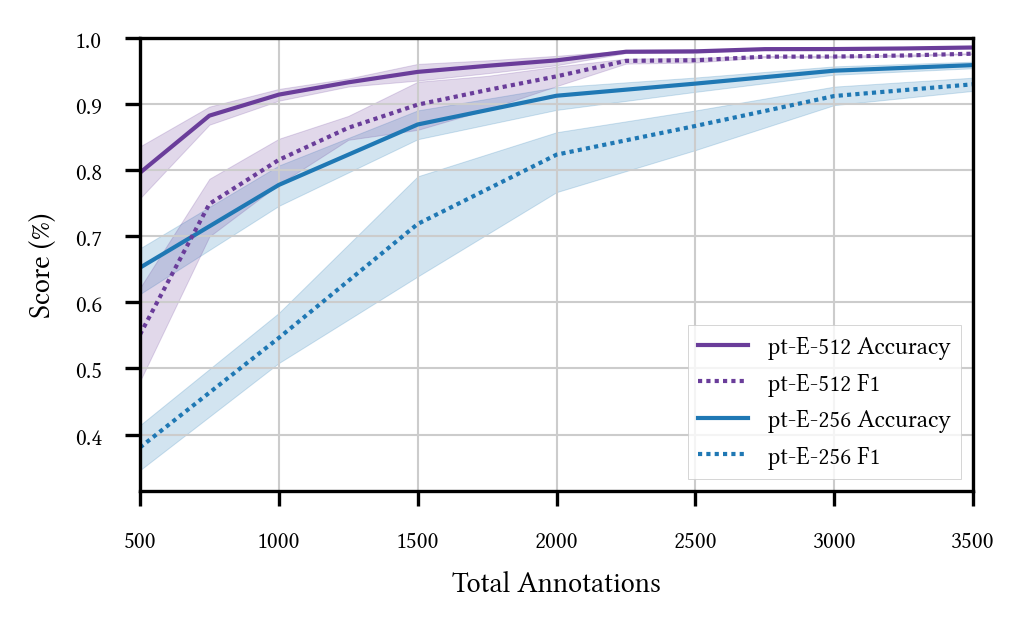

In [ ]:
rc1()
results_x = results[results['Model'].isin(['pt-E-256','pt-E-512'])]
results_x = results_x[results_x['Total Annotations']<4000]

sns.lineplot(data=results_x, x="Total Annotations", y="Accuracy", style="Model", hue="Model", dashes=pt_dash_style, palette=color_style)
sns.lineplot(data=results_x, x="Total Annotations", y="F1", hue="Model", palette=color_style, style="Model", dashes=[(1,1),(1,1)])

leg = plt.legend()
leg_lines = leg.get_lines()
leg_lines[1].set_linestyle("dotted")

plt.xlabel('Total Annotations')
better_labels =[
        'pt-E-256 Accuracy',
        'pt-E-512 Accuracy',
        'pt-E-256 F1',
        'pt-E-512 F1']

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [1, 3, 0, 2]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [better_labels[i] for i in order])

plt.ylabel('Score (%)')
plt.ylim(top=1)
plt.xlim(500,3500)

savefig(plt, 'pt-E-256-512-seq', no_save=False)

In [ ]:
rc1()
results_x = results[results['Model'].isin(['pt-E-256','pt-E-512'])]
results_x = results_x[results_x['Total Annotations']<4000]

sns.lineplot(data=results_x, x="Total Annotations", y="Accuracy", style="Model", hue="Model", dashes=pt_dash_style, palette=color_style)
sns.lineplot(data=results_x, x="Total Annotations", y="F1", hue="Model", palette=color_style, style="Model", dashes=[(1,1),(1,1)])

leg = plt.legend()
leg_lines = leg.get_lines()
leg_lines[1].set_linestyle("dotted")

plt.xlabel('Total Annotations')
better_labels =[
        'pt-E-256 Accuracy',
        'pt-E-512 Accuracy',
        'pt-E-256 F1',
        'pt-E-512 F1']

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [1, 3, 0, 2]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [better_labels[i] for i in order])

plt.ylabel('Score (%)')
plt.ylim(top=1)
plt.xlim(500,3500)

savefig(plt, 'pt-E-256-512-seq', no_save=False)

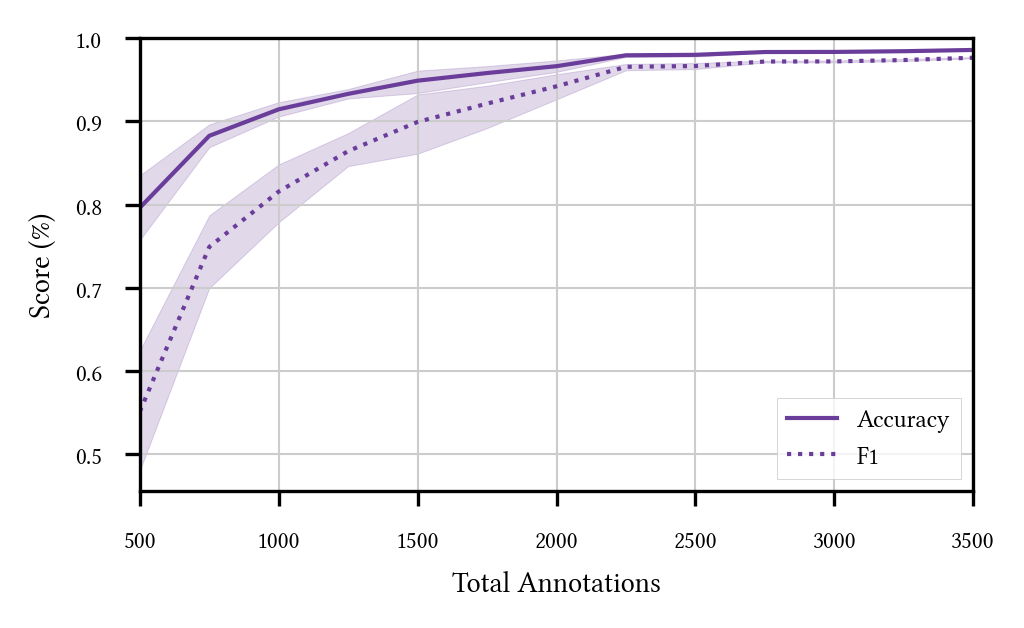

In [ ]:
rc1()
results_x = results[results['Model'].str.contains('512')]
results_x = results_x[results_x['Total Annotations']<4000]

sns.lineplot(data=results_x, x="Total Annotations", y="Accuracy", color="#6a3d9a")
sns.lineplot(data=results_x, x="Total Annotations", y="F1", color="#6a3d9a", linestyle="dotted")

plt.xlabel('Total Annotations')
plt.legend(labels=['Accuracy', 'F1'], loc=4)
plt.ylabel('Score (%)')
plt.ylim(top=1)
plt.xlim(500,3500)

savefig(plt, 'pt-E-512-seq')

In [ ]:
sns.color_palette("Paired")

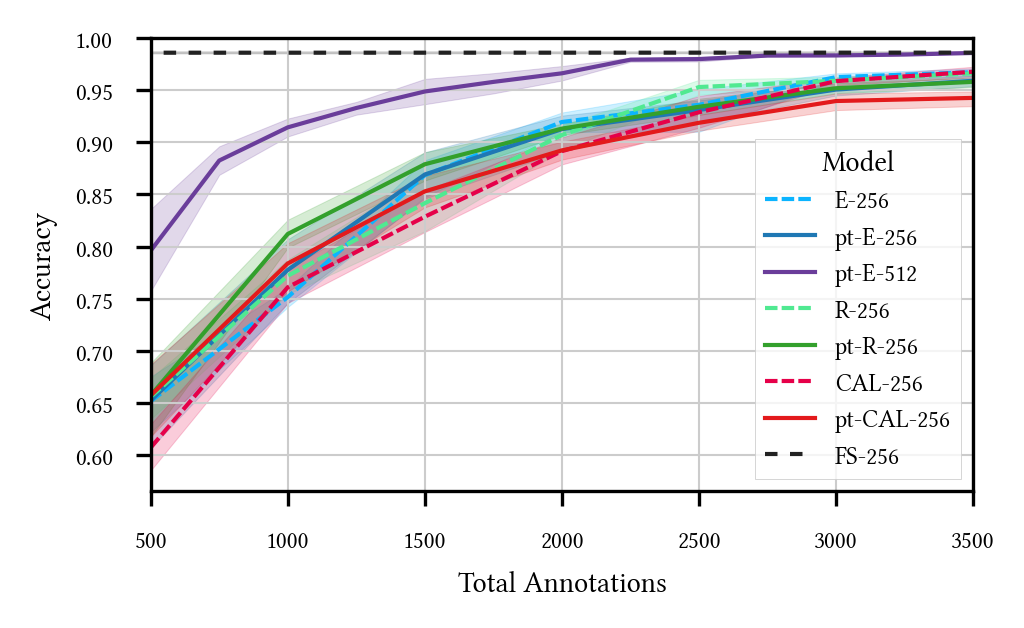

In [ ]:
rc1()
sns.lineplot(data=results, x="Total Annotations", y="Accuracy", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
plt.xlim(500,3500)
plt.ylim(top=1)

savefig(plt, 'Acc-all-models')

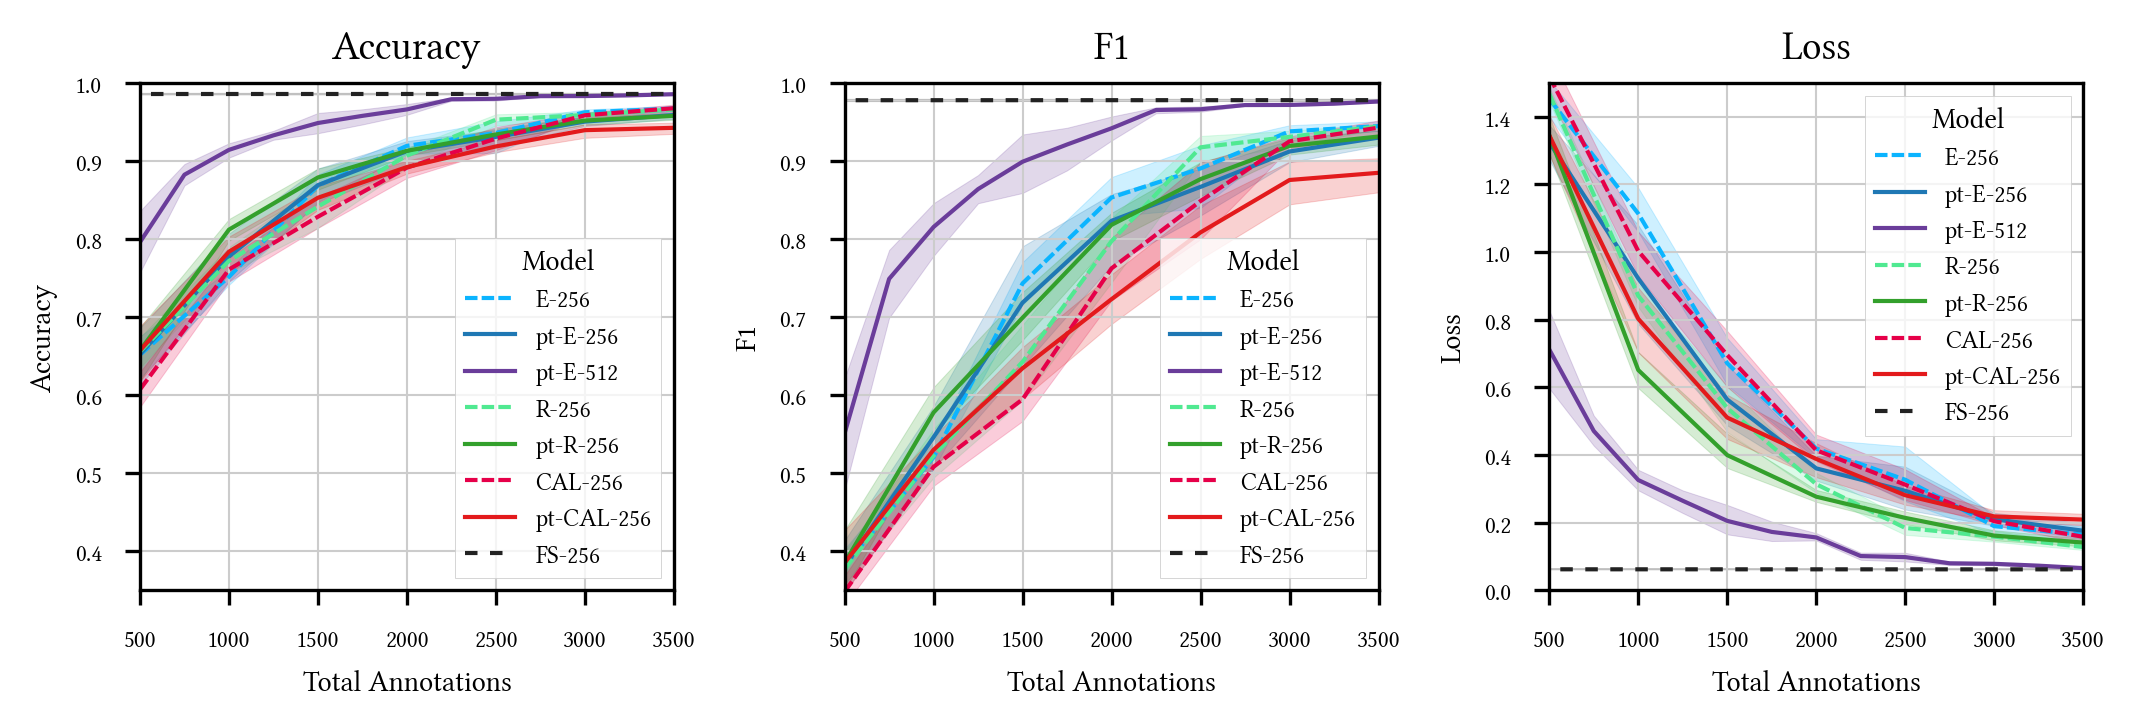

In [ ]:
rc2()
fig, axes = plt.subplots(1, 3, sharey=False)
# fig.suptitle('performance')

sns.lineplot(ax=axes[0], data=results, x="Total Annotations", y="Accuracy", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[0].set_title("Accuracy")
axes[0].set_ylim(0.35,1)

sns.lineplot(ax=axes[1], data=results, x="Total Annotations", y="F1", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)

axes[1].set_title("F1")
axes[1].set_ylim(0.35,1)

sns.lineplot(ax=axes[2], data=results, x="Total Annotations", y="Loss", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)

axes[2].set_title("Loss")
axes[2].set_ylim(0, 1.5)

for i in range(3):
  axes[i].set_xlim(500,3500)
  axes[i].set_xlabel('Total Annotations')

savefig(plt, 'perf-all-models')

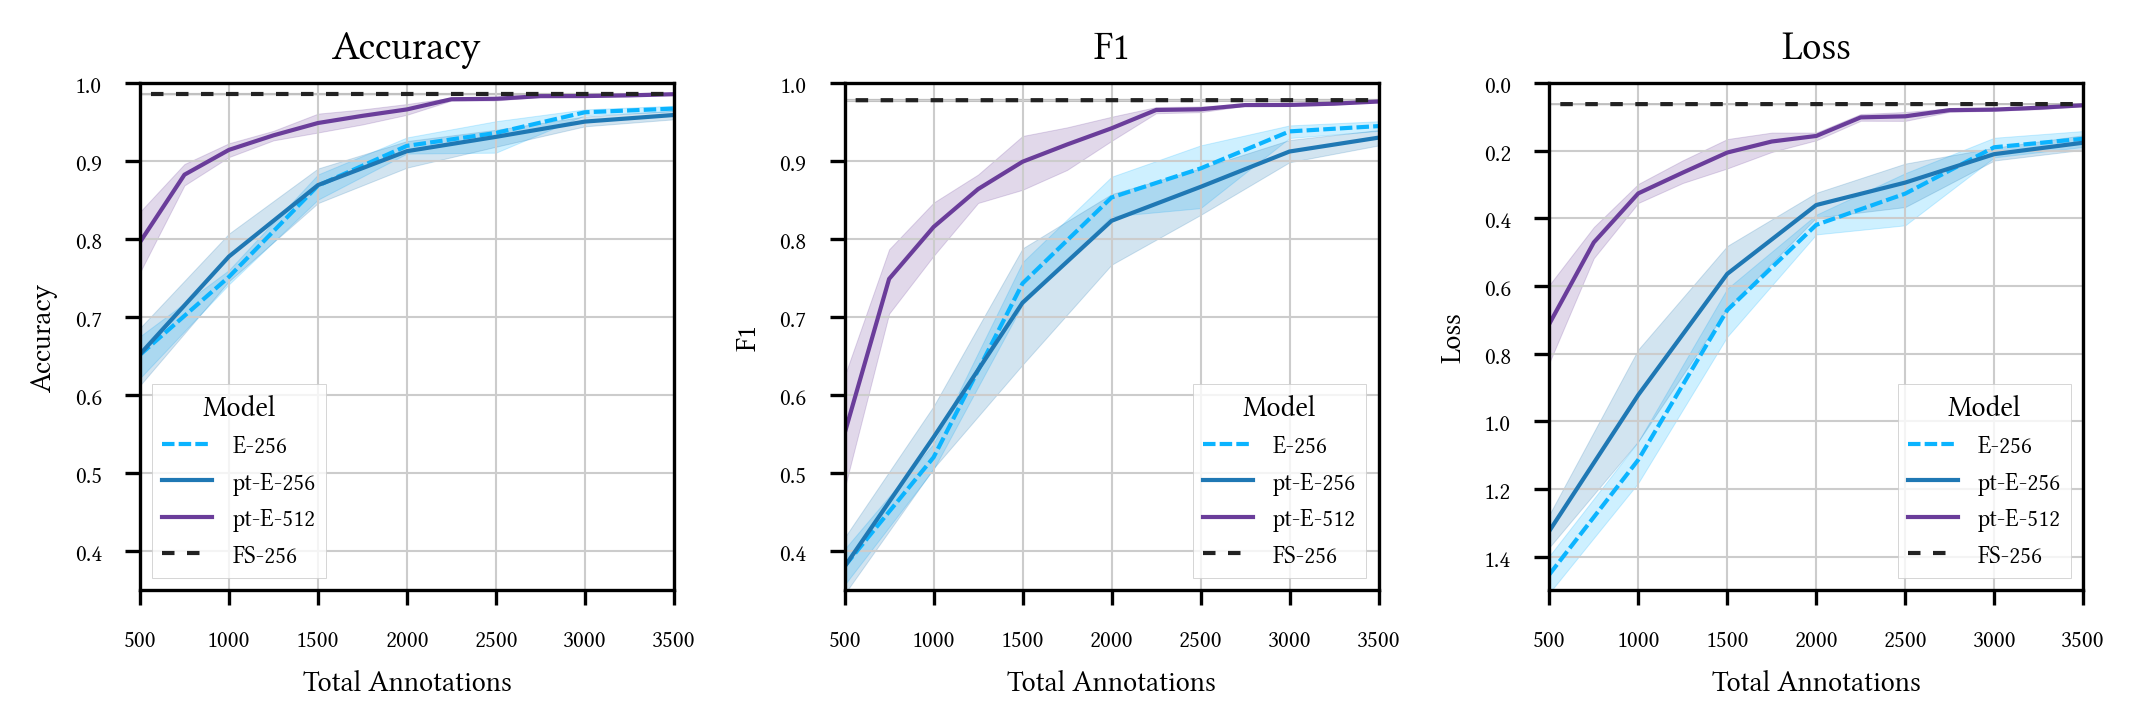

In [ ]:
rc2()

results_x = results[results['Model'].str.contains('E|FS')]

fig, axes = plt.subplots(1, 3, sharey=False)
#fig.suptitle('performance of Entropy models')

sns.lineplot(ax=axes[0], data=results_x, x="Total Annotations", y="Accuracy", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[0].set_title("Accuracy")
axes[0].set_ylim(0.35,1)

sns.lineplot(ax=axes[1], data=results_x, x="Total Annotations", y="F1", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[1].set_title("F1")
axes[1].set_ylim(0.35,1)

sns.lineplot(ax=axes[2], data=results_x, x="Total Annotations", y="Loss", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[2].set_title("Loss")
axes[2].set_ylim(1.5,0)

for i in range(3):
  axes[i].set_xlim(500,3500)

savefig(plt, 'perf-E-models')

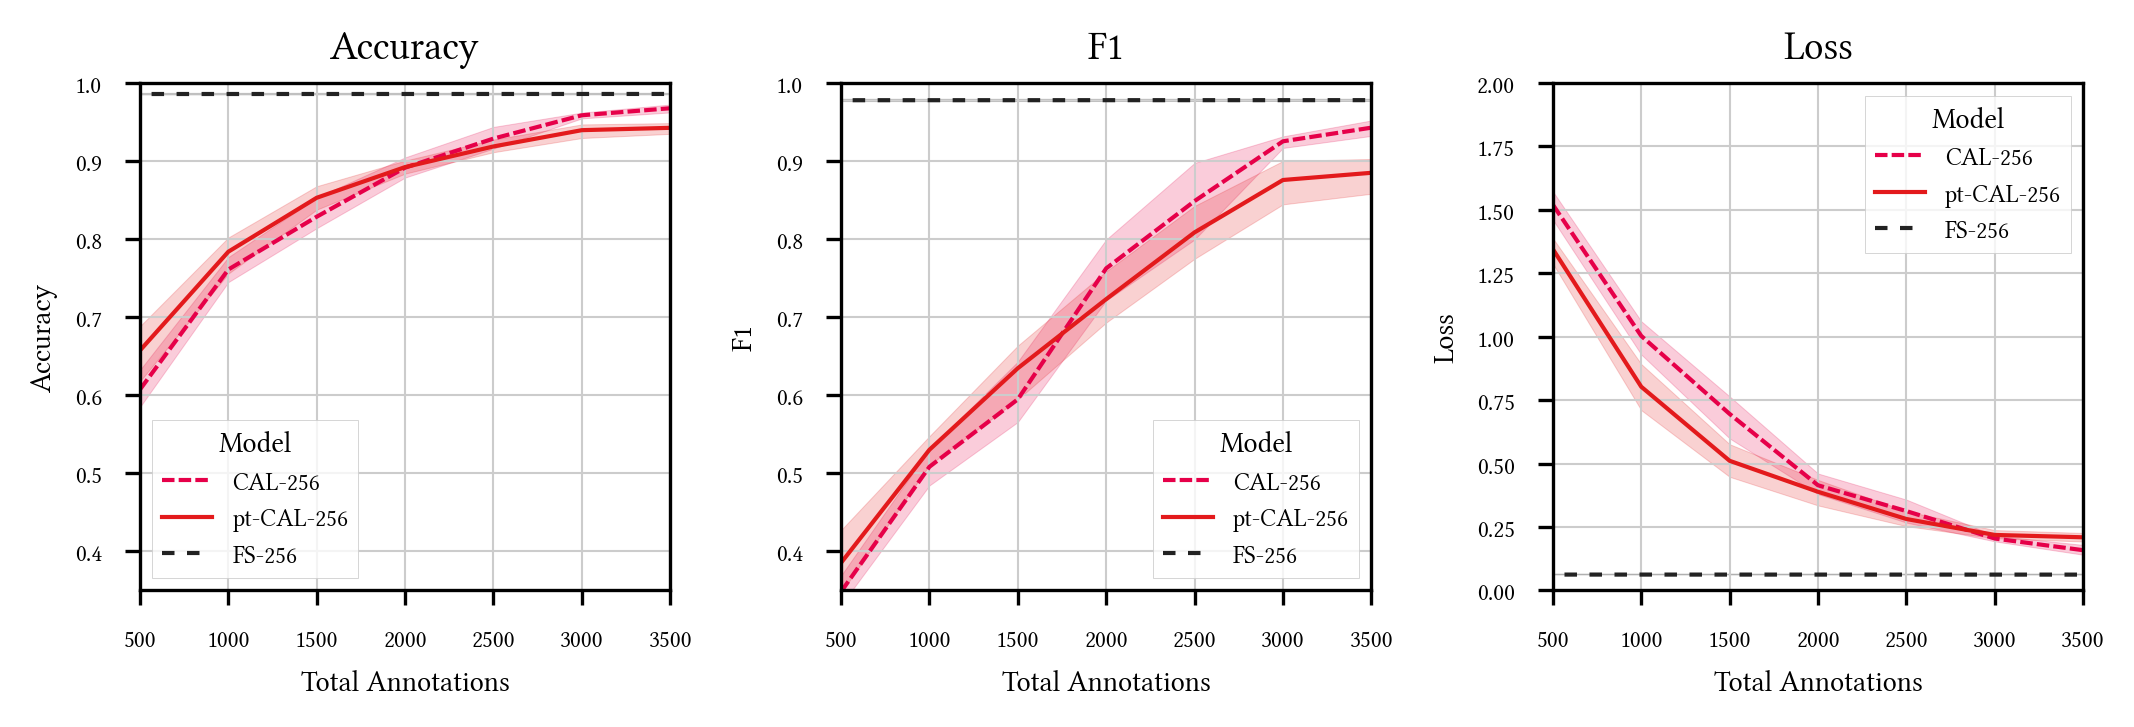

In [ ]:
rc2()

results_x = results[results['Model'].str.contains('CAL|FS')]

fig, axes = plt.subplots(1, 3, sharey=False)
# fig.suptitle('performance of Random models')

sns.lineplot(ax=axes[0], data=results_x, x="Total Annotations", y="Accuracy", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[0].set_title("Accuracy")
axes[0].set_ylim(0.35,1)

sns.lineplot(ax=axes[1], data=results_x, x="Total Annotations", y="F1", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[1].set_title("F1")
axes[1].set_ylim(0.35,1)

sns.lineplot(ax=axes[2], data=results_x, x="Total Annotations", y="Loss", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[2].set_title("Loss")
axes[2].set_ylim(0, 2)

for i in range(3):
  axes[i].set_xlim(500,3500)

savefig(plt, 'perf-CAL-models')

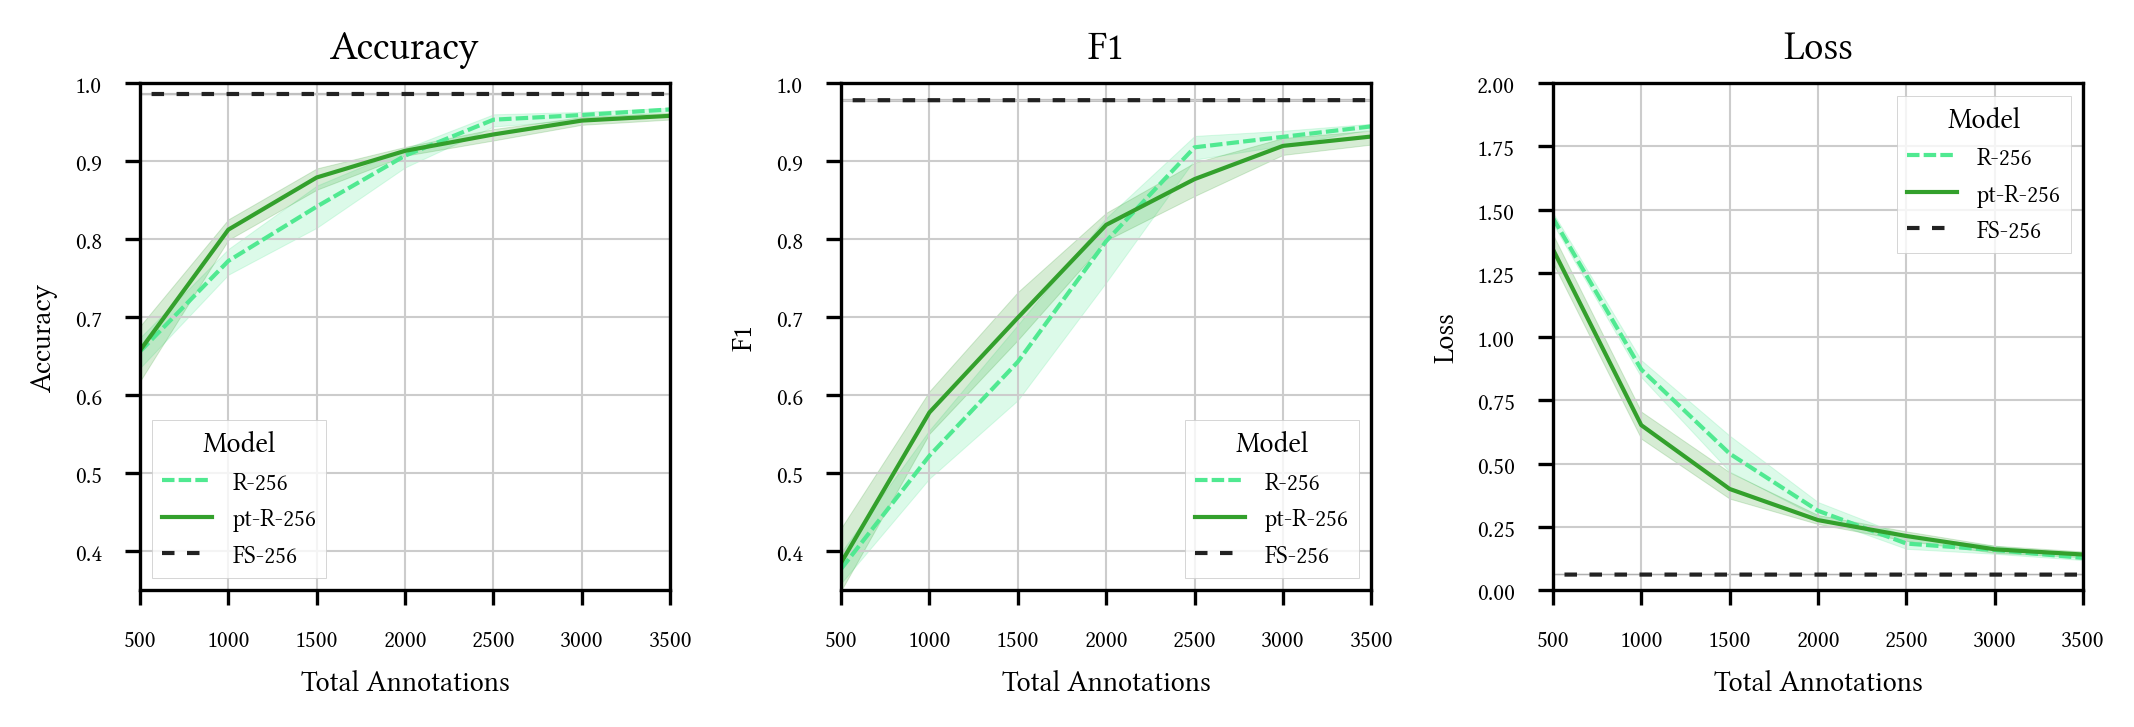

In [ ]:
rc2()

results_x = results[results['Model'].str.contains('R|FS')]

fig, axes = plt.subplots(1, 3, sharey=False)
# fig.suptitle('performance of Random models')

sns.lineplot(ax=axes[0], data=results_x, x="Total Annotations", y="Accuracy", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[0].set_title("Accuracy")
axes[0].set_ylim(0.35,1)

sns.lineplot(ax=axes[1], data=results_x, x="Total Annotations", y="F1", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[1].set_title("F1")
axes[1].set_ylim(0.35,1)

sns.lineplot(ax=axes[2], data=results_x, x="Total Annotations", y="Loss", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[2].set_title("Loss")
axes[2].set_ylim(0, 2)

for i in range(3):
  axes[i].set_xlim(500,3500)

savefig(plt, 'perf-R-models')

In [ ]:
# rc2()

# results_x = results[results['Model'].isin(['R-256', 'E-256', 'pt-R-256', 'pt-E-256', 'pt-CAL-256'])]

# fig, axes = plt.subplots(1, 3, sharey=False)
# # fig.suptitle('performance of 256 seq.len. models')

# sns.lineplot(ax=axes[0], data=results_x, x="Total Annotations", y="Accuracy", hue="Model", style="Model", dashes=pt_dash_style)
# axes[0].set_title("Accuracy")
# axes[0].set_ylim(0.35,1)

# sns.lineplot(ax=axes[1], data=results_x, x="Total Annotations", y="F1", hue="Model", style="Model", dashes=pt_dash_style)
# axes[1].set_title("F1")
# axes[1].set_ylim(0.35,1)

# sns.lineplot(ax=axes[2], data=results_x, x="Total Annotations", y="Loss", hue="Model", style="Model", dashes=pt_dash_style)
# axes[2].set_title("Loss")
# axes[2].set_ylim(0, 1.5)

# for i in range(3):
#   axes[i].set_xlim(500,3500)

# savefig(plt, 'perf-E-models')

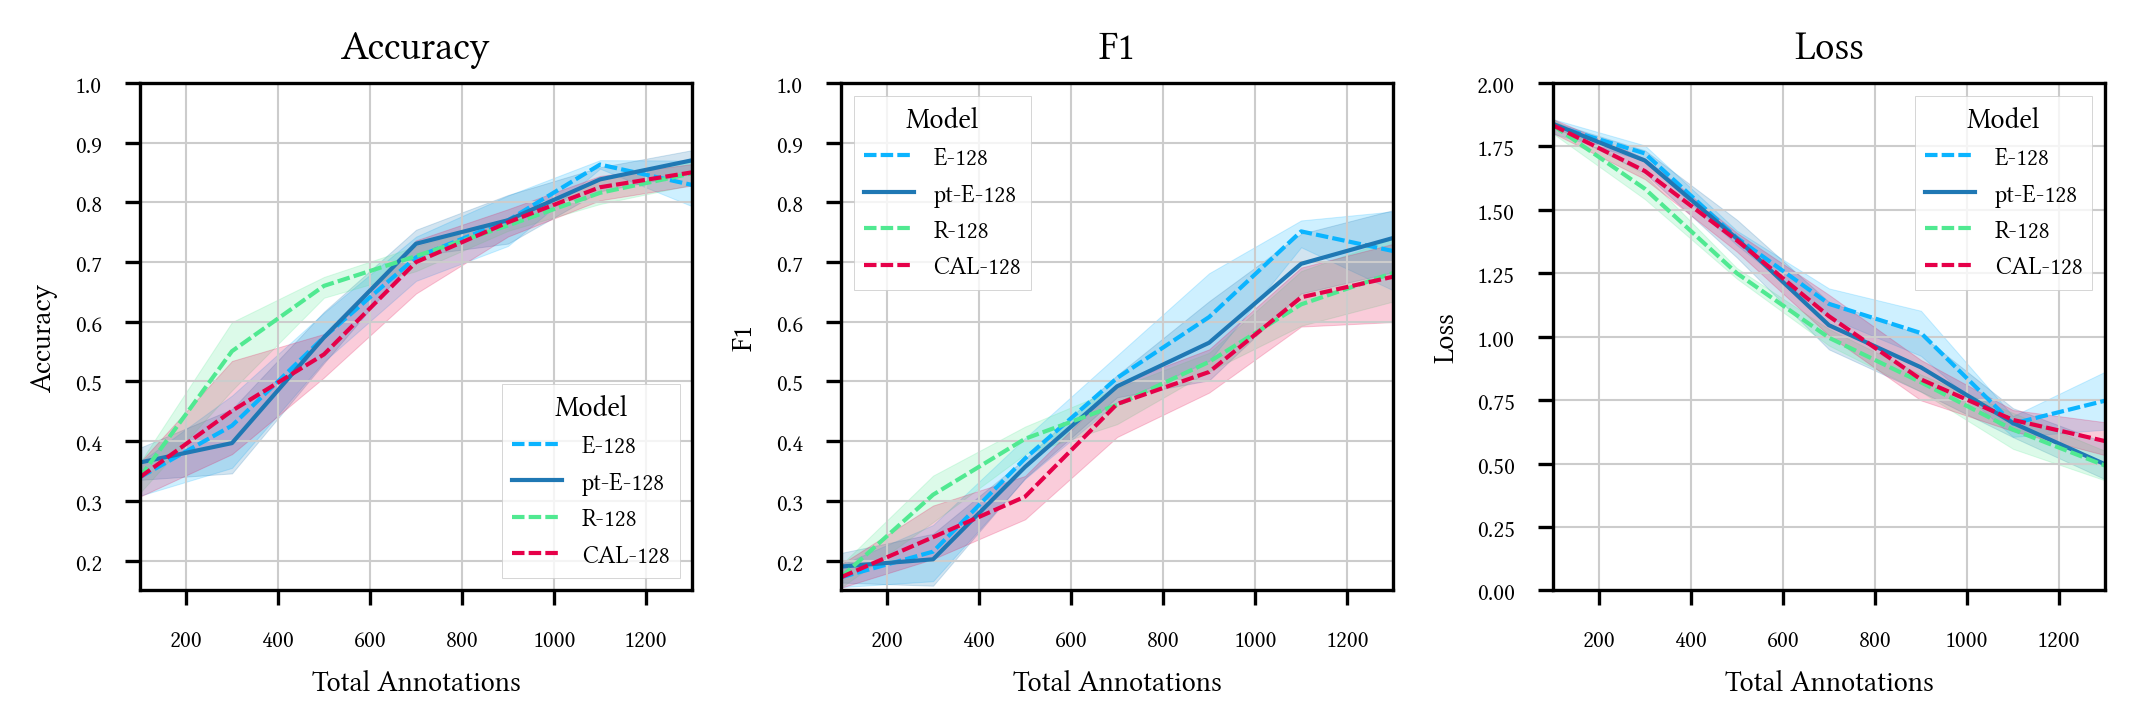

In [ ]:
rc2()

results_x = M128

fig, axes = plt.subplots(1, 3, sharey=False)
# fig.suptitle('performance of 128 seq.len. models')

sns.lineplot(ax=axes[0], data=results_x, x="Total Annotations", y="Accuracy", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[0].set_title("Accuracy")
axes[0].set_ylim(0.15,1)

sns.lineplot(ax=axes[1], data=results_x, x="Total Annotations", y="F1", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[1].set_title("F1")
axes[1].set_ylim(0.15,1)

sns.lineplot(ax=axes[2], data=results_x, x="Total Annotations", y="Loss", hue="Model", style="Model", dashes=pt_dash_style, palette=color_style)
axes[2].set_title("Loss")
axes[2].set_ylim(0, 2)

for i in range(3):
  axes[i].set_xlim(100,1300)

savefig(plt, 'perf-128-models')

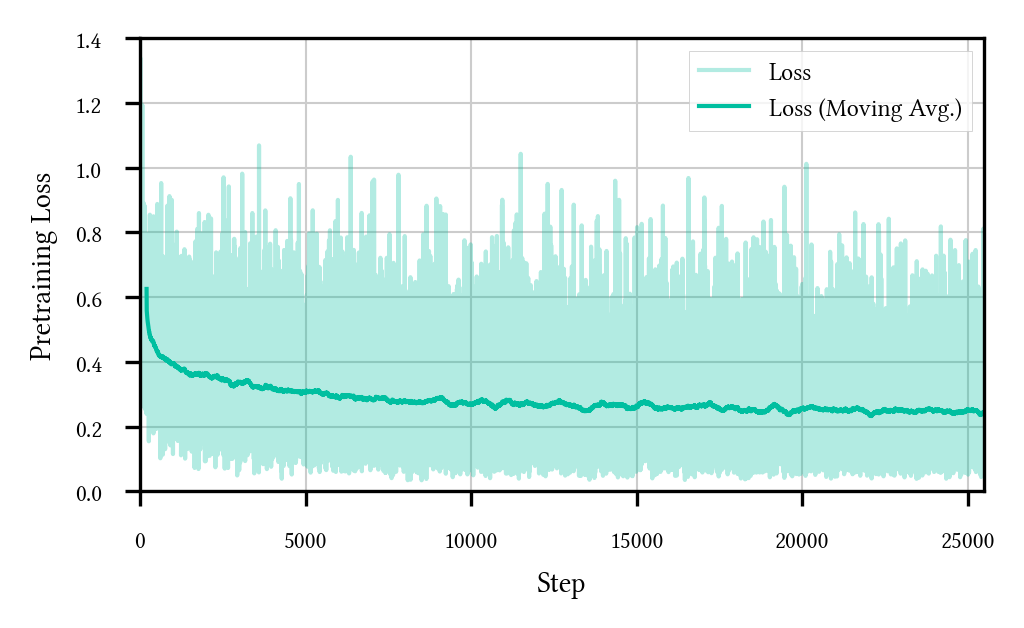

In [ ]:
rc1()

path_Losses = path = '/content/drive/MyDrive/UvA/thesis/models/taptBERTje/losses.pkl'

with open(path_Losses, 'rb') as f:
    Losses = pickle.load(f)
    df = pd.DataFrame()
    df['Loss'] = Losses
    df['Loss_avg'] = df.Loss.rolling(401).mean().shift(-200)
    df['Step'] = range(len(Losses))
    sns.lineplot(x='Step', y='Loss', data=df, alpha=0.3, color="#00bfa0")
    sns.lineplot(x='Step', y='Loss_avg', data=df, color="#00bfa0")
    plt.ylabel('Pretraining Loss')
    # plt.title('Continued pretraining Loss')
    plt.legend(labels=["Loss","Loss (Moving Avg.)"], loc=1)
    plt.ylim(0,1.4)
    plt.xlim(0,25500)

# sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

savefig(plt, 'loss')

# Tables

In [ ]:
results.head()

,Iteration,Total Annotations,Model,F1,Accuracy,Recall,Precision,Entropy Mean,Entropy Var,Accuracy & F1,Loss,class_div,Selection Time,Inference Time
140,1,500,E-256,0.418293,0.675715,0.4521,0.4725,2.646,0.010,0.547004,1.463658,"[[3, 43.4], [7, 14.000000000000002], [1, 4.2],...",0.100550,168.168239
141,2,1000,E-256,0.520016,0.762983,0.5560,0.4940,2.264,0.275,0.641500,1.054302,"[[4, 11.666666666666666], [7, 12.4666666666666...",0.060266,167.876895
142,3,1500,E-256,0.724533,0.881427,0.7307,0.8799,1.817,0.324,0.802980,0.627370,"[[6, 17.549999999999997], [1, 11.8999999999999...",0.058446,164.854025
143,4,2000,E-256,0.858470,0.921823,0.8591,0.9175,1.428,0.289,0.890147,0.429298,"[[0, 12.479999999999999], [7, 9.04], [4, 10.92...",0.066049,164.859000
144,5,2500,E-256,0.922436,0.950770,0.9150,0.9371,1.076,0.230,0.936603,0.295821,"[[7, 12.1], [2, 11.566666666666666], [0, 11.3]...",0.068820,162.110358


In [ ]:
a = 0.1264
f'{a:.2f}'[1:]

'.13'

In [ ]:
def make_dot(x):
  return x[1:5]

def make_table(df, order, round=4, latex=False):
  df = df[df['Total Annotations'].isin([3500,49500])]
  df = df[['Model','Accuracy','F1', 'Recall', 'Precision' , 'Entropy Mean', 'Entropy Var',]]
  tab = df.groupby('Model').agg({
      'Accuracy' : ['mean', 'std', 'min', 'max'],
      'F1' : ['mean', 'std', 'min', 'max'],
      'Precision' : ['mean', 'std'],
      'Recall' : ['mean', 'std'],
      'Entropy Mean' : ['mean'],
      'Entropy Var' : ['mean']
  }).round(round)

  tab = tab.reindex(order)
  if latex:
    tab = tab.to_latex()
    tab = tab.replace("0.",".")
  return tab

In [ ]:
order = [
         'E-256', 
         'pt-E-256',
         'pt-E-512',
         'R-256',
         'pt-R-256',
         'CAL-256',
         'pt-CAL-256',
         'FS-256'
         ]

order_20 = [
         'E-256',
         'R-256',
         'CAL-256',
         'FS-256'
         ]

# make_table(results, order, latex=True)

# print(make_table(results_20, order_20, latex=True))

print(make_table(results_20, order_20, latex=True))



\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
{} & \multicolumn{4}{l}{Accuracy} & \multicolumn{4}{l}{F1} & \multicolumn{2}{l}{Precision} & \multicolumn{2}{l}{Recall} & Entropy Mean & Entropy Var \\
{} &     mean &     std &     min &     max &    mean &     std &     min &     max &      mean &     std &    mean &     std &         mean &        mean \\
Model   &          &         &         &         &         &         &         &         &           &         &         &         &              &             \\
\midrule
E-256   &   .8812 &  .0088 &  .8734 &  .8906 &  .4450 &  .0110 &  .4324 &  .4520 &    .4886 &  .0194 &  .4498 &  .0042 &       1.9880 &      .6353 \\
R-256   &   .8978 &  .0117 &  .8846 &  .9071 &  .4094 &  .0188 &  .3902 &  .4279 &    .4260 &  .0258 &  .4226 &  .0190 &       1.1557 &      1.2317 \\
CAL-256 &   .8766 &  .0235 &  .8624 &  .9038 &  .3440 &  .0440 &  .3062 &  .3923 &    .3875 &  .0472 &  .3488 &  .0543 &       1.6343 &      1.2683 \\
FS-256  &   .9581 &     

In [ ]:
order = [
         'E-256', 
         'pt-E-256',
         'R-256',
         'pt-R-256',
         'CAL-256',
         'pt-CAL-256',
         ]

df = results[~results['Model'].isin(['FS-256', 'pt-E-512', 'E-128', 'pt-E-128', 'R-128', 'CAL-128'])]
df = df[['Model','Selection Time', 'Inference Time']]
tab = df.groupby('Model').agg({
    'Selection Time' : ['mean', 'sum', 'std', 'count'],
    'Inference Time' : ['mean', 'sum', 'std', 'count'],
}).round(1)
tab = tab.reindex(order)
tab


Selection Time                     Inference Time                \
                     mean     sum   std count           mean      sum  std   
Model                                                                        
E-256                 0.1     2.3   0.0    35          163.4   5718.9  3.6   
pt-E-256              0.1     2.5   0.0    35          458.4  16044.6  9.4   
R-256                 0.1     1.9   0.0    35            0.0      0.0  0.0   
pt-R-256              0.1     2.1   0.0    35            0.0      0.0  0.0   
CAL-256             173.7  6080.3  42.9    35          455.5  15943.3  9.7   
pt-CAL-256          140.0  4899.1  29.0    35          163.2   5713.0  3.4   

                  
           count  
Model             
E-256         35  
pt-E-256      35  
R-256         35  
pt-R-256      35  
CAL-256       35  
pt-CAL-256    35